In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df_train = pd.read_csv('../data/training_data.csv', low_memory=False)
df_macro = pd.read_csv('../data/macro_data.csv')

In [112]:
np.unique(df_train['bank_fico_buckets_20']).astype(str)

array(['561-580', '581-600', '601-620', '621-640', '641-660', '661-680',
       '681-700', '701-720', '721-740', '741-760', '761+', '<= 560',
       'Exception', 'Missing'], dtype='<U9')

In [91]:
d

,financial_active,promotion_flag,variable_rate_index,active_12_mths,charge_off_reason_code,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,year,month
mth_code,,,,,,,,,,,,,,,,,,,,,
201801,13354.0,6989,5642,17658.0,0.0,1195759,19706.0,2218.0,2213.0,115236.15,...,1031636.44,176053.77,186044.49,141925.06,115160.23,121627.48,0.00,4007364258,40073444,19858
201802,26454.0,13938,11327,35045.0,0.0,2397630,39301.0,4483.0,4677.0,229380.99,...,2216066.10,431785.80,337333.86,285258.40,227811.14,250905.78,0.00,8012730356,80126708,79412
201803,39247.0,20534,16931,52381.0,0.0,3555091,58825.0,6688.0,6528.0,338806.08,...,3168372.74,623633.79,583897.88,359504.70,331956.97,309386.85,0.00,11999550589,119994316,178386
201804,51750.0,27279,22594,69167.0,0.0,4764651,78262.0,9051.0,8415.0,457466.35,...,4097632.78,913387.17,595314.05,507002.67,525039.86,548493.68,0.00,15965605054,159654070,316460
201805,64073.0,33615,28229,86158.0,0.0,5898898,97617.0,11289.0,10264.0,561074.39,...,5119756.58,1105392.38,718495.57,677154.97,518651.42,510969.98,0.00,19920781917,199204852,493570
201806,75687.0,40112,33616,102522.0,0.0,7103153,116849.0,13190.0,12582.0,670721.14,...,6465786.41,1431195.32,917881.77,885129.81,723884.52,769101.14,0.00,23852165696,238517510,709170
201807,87928.0,46588,38682,118760.0,0.0,8240115,135963.0,15513.0,14211.0,778844.52,...,7189488.15,1558427.61,1012632.76,902964.32,816590.78,864799.07,0.00,27767223067,277666710,963165
201808,99590.0,52768,44086,134756.0,0.0,9363877,155102.0,17519.0,15960.0,880711.91,...,8238020.94,2029356.49,1196157.09,1026785.52,1059226.45,893222.24,0.00,31679071037,316783622,1255832
201809,111509.0,58741,49355,150846.0,0.0,10520874,174158.0,19869.0,18148.0,988361.05,...,9261144.38,1909953.89,1364465.65,1081499.12,1220892.67,1024241.91,0.00,35578830388,355779454,1586727


In [95]:
o == 'A'

0          False
1          False
2           True
3          False
4          False
           ...  
5758218     True
5758219    False
5758220    False
5758221    False
5758222    False
Name: industry, Length: 5758223, dtype: bool

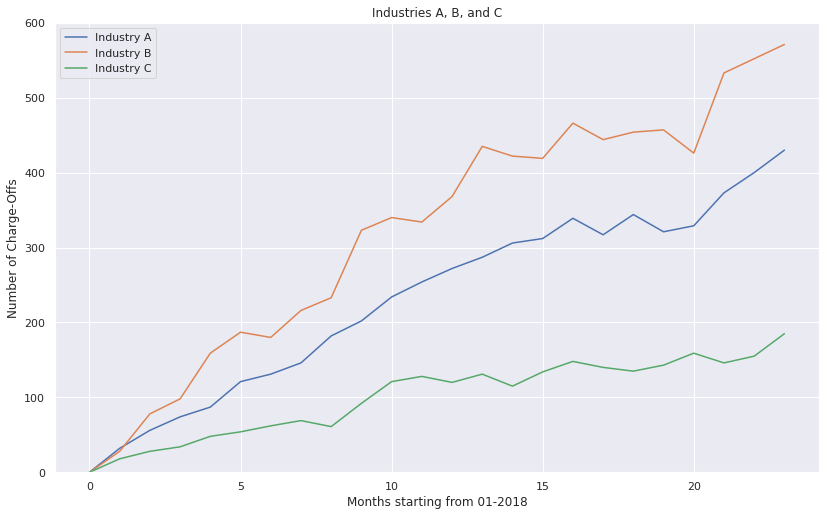

In [10]:
o = df_train['industry'].astype(str)
d = df_train[o == 'A'].groupby('mth_code').sum()

plt.plot(np.arange(0, 24), d['charge_off'], label='Industry A')


o = df_train['industry'].astype(str)
d = df_train[o == 'B'].groupby('mth_code').sum()

plt.plot(np.arange(0, 24), d['charge_off'], label='Industry B' )

o = df_train['industry'].astype(str)
d = df_train[o == 'C'].groupby('mth_code').sum()

plt.title("Industries A, B, and C")
plt.xlabel("Months starting from 01-2018")
plt.ylabel("Number of Charge-Offs")
plt.plot(np.arange(0, 24), d['charge_off'], label='Industry C')
plt.ylim(0, 600)

plt.legend(loc='upper left')
plt.show()

<AxesSubplot:xlabel='bank_fico_buckets_20', ylabel='Count'>

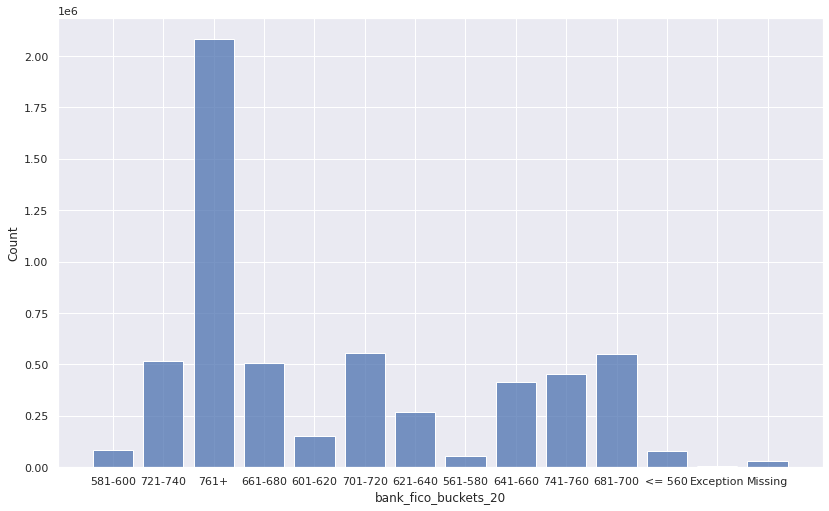

In [9]:
fico_bucket_scores = ['561-580', '581-600', '601-620', '621-640', '641-660', '661-680','681-700', '701-720', '721-740', '741-760', '761+', '<= 560','Exception', 'Missing']

sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.histplot(df_train, x='bank_fico_buckets_20', shrink=.8)




-17709
-18890
-19584
-17356
-20519
-18726
-18375
-19718
-19095
-18200
-18536
-18684
-17857
-19695
-18993
-18247
-19951
-19287
-19006
-19730
-19477
-19500
-19679


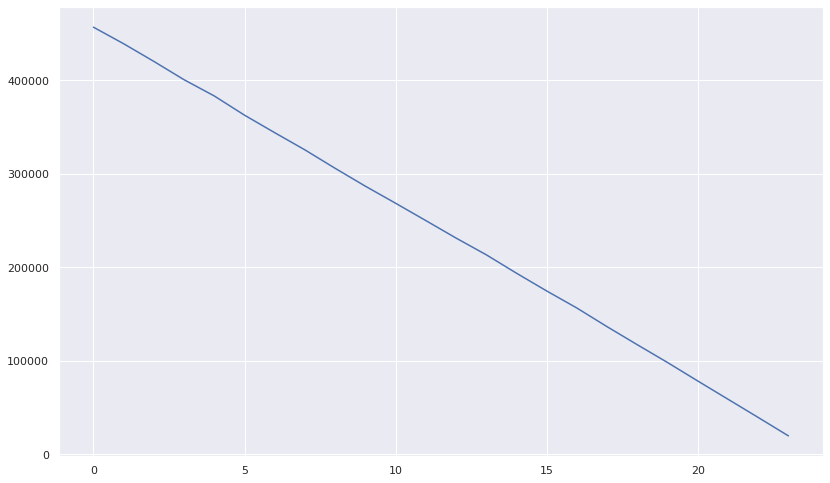

In [28]:
t = np.unique(df_train['snapshot'])
f = 0
l = []
for i in t:
    l.append(len(df_train[df_train['snapshot']==i]))
plt.plot(np.arange(0, 24), l)
for j in range(len(l)-1):
    print(l[j+1] - l[j])

In [32]:
snapshots = np.unique(df_train['snapshot'])
months = np.unique(df_train['mth_code'])

In [50]:
for i in snapshots:
    print(len((df_train[df_train['snapshot']==snapshots[0]])[df_train['mth_code']==i]))
    #print(len((df_train[df_train['snapshot']==i])[df_train['open_closed_flag']==1]))
    #print(len((df_train[df_train['snapshot']==21801])[df_train['mth_code']==i+1]))

/tmp/ipykernel_175328/2709081724.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len((df_train[df_train['snapshot']==snapshots[0]])[df_train['mth_code']==i]))


19858
19856
19776
19679
19615
19532
19446
19373
19302
19246
19181
19106
19045
18961
18857
18749
18652
18562
18482
18401
18334
18260
18186
18100


19848
19756
19653
19599
19481
19400
19384
19324
19270
19069
19097
19074
18496
18306
18088
17982
17930
18013
17929
17858
17898
17713
17637


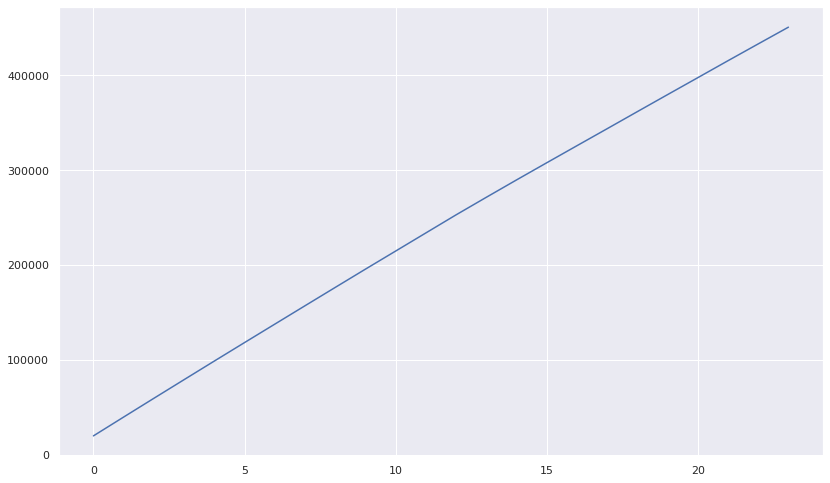

In [29]:
t = np.unique(df_train['mth_code'])
f = 0
l = []
for i in t:
    l.append(len(df_train[df_train['mth_code']==i]))
plt.plot(np.arange(0, 24), l)
for j in range(len(l)-1):
    print(l[j+1] - l[j])

In [17]:
print(np.sum(l))
print(len(df_train['mob']==0))

5758223
5758223


In [149]:
np.unique(df_train['mth_code'])

array([201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
       201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912])

In [57]:
df_train['year'] = df_train['mth_code'] // 100
df_train['month'] = df_train['mth_code'] % 100

In [4]:
df_train_imp = df_train[
    ['financial_active',
     'bank_fico_buckets_20',
     'mob',
     'nbr_mths_due',
     'variable_rate_margin',
     'year',
     'month',
     #'mth_code',
     'charge_off',
     'charge_off_aged',
     'charge_off_bk',
    ]
]



,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,0.0,T,1,0,A,1.0,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,A
5758219,1.0,I,1,0,A,1.0,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,C
5758220,1.0,R,1,0,I 0-6,1.0,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B
5758221,0.0,T,1,0,Recovery,1.0,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B


In [25]:
df_train['snapshot'][0:20]

0     201801
1     201801
2     201801
3     201801
4     201801
5     201801
6     201801
7     201801
8     201801
9     201801
10    201801
11    201801
12    201801
13    201801
14    201801
15    201801
16    201801
17    201801
18    201801
19    201801
Name: snapshot, dtype: int64

In [24]:
df_train['mth_code'][0:20]

0     201807
1     201906
2     201905
3     201806
4     201902
5     201905
6     201812
7     201912
8     201806
9     201901
10    201902
11    201805
12    201810
13    201803
14    201907
15    201902
16    201902
17    201912
18    201911
19    201809
Name: mth_code, dtype: int64

In [21]:
accuracies = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_train_imp_x, df_train_imp_y, test_size=0.1)
    clf = RandomForestClassifier(max_depth=50)
    clf.fit(X_train, y_train)
    acc = clf.score(X-test, y_test)
    accuracies.append(acc)

0            0
1            0
2            0
3            0
4            0
          ... 
5758218    111
5758219    111
5758220    111
5758221    111
5758222    111
Name: snapshot, Length: 5758223, dtype: int64